<a href="https://colab.research.google.com/github/viniciusbeckerdesouza/vendas_comissoes_fintech/blob/main/An%C3%A1lise_de_vendas_e_comiss%C3%B5es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Relatório

Este relatório apresenta análises e insights retirados de um dataset de vendas e comissões do período entre Janeiro e Julho de 2021.

Os principais achados são:

1. O ticket médio das vendas foi de R$214164,20.

2. A comissão média foi de R$1505,22.

3. Houve um pico de vendas em março, e desde então vem caindo.

4. Existe uma forte correlação entre o valor de venda e o valor da comissão, a política de comissão 0.01 e o produto B. Esta relação poderia ser melhor explorada.

In [1]:
#@title
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('paper')
plt.rcParams['figure.figsize'] = (11,7)

In [4]:
#@title
df = pd.read_excel('https://github.com/viniciusbeckerdesouza/vendas_comissoes_fintech/blob/main/fintech.xlsx?raw=true')
df.head()

,data_solicitacao,data_venda,data_pagto,valor_venda,pol_comissao,valor_comissao,estado_cliente,estado_vendedor,produto,vendedor_id
0,2021-01-13,2021-01-12,2021-02-01 00:00:00,NaN,un.,750.0,SC,PR,A,V_1
1,2021-02-14,2021-02-16,2021-03-01 00:00:00,NaN,un.,750.0,SC,PR,A,V_1
2,2021-02-17,2021-02-18,2021-03-01 00:00:00,NaN,un.,750.0,NaN,PR,A,V_23
3,2021-03-21,2021-03-25,2021-04-01 00:00:00,NaN,un.,750.0,NaN,PR,A,V_23
4,2021-01-29,2021-01-31,2021-03-01 00:00:00,NaN,un.,750.0,NaN,PR,A,V_30


In [5]:
#@title
df['mes_venda'] = df['data_venda'].dt.month
df['dia_semana'] = df['data_venda'].dt.day_name()

In [6]:
#@title
df.head()

,data_solicitacao,data_venda,data_pagto,valor_venda,pol_comissao,valor_comissao,estado_cliente,estado_vendedor,produto,vendedor_id,mes_venda,dia_semana
0,2021-01-13,2021-01-12,2021-02-01 00:00:00,NaN,un.,750.0,SC,PR,A,V_1,1,Tuesday
1,2021-02-14,2021-02-16,2021-03-01 00:00:00,NaN,un.,750.0,SC,PR,A,V_1,2,Tuesday
2,2021-02-17,2021-02-18,2021-03-01 00:00:00,NaN,un.,750.0,NaN,PR,A,V_23,2,Thursday
3,2021-03-21,2021-03-25,2021-04-01 00:00:00,NaN,un.,750.0,NaN,PR,A,V_23,3,Thursday
4,2021-01-29,2021-01-31,2021-03-01 00:00:00,NaN,un.,750.0,NaN,PR,A,V_30,1,Sunday


In [7]:
#@title
df[['valor_venda',	'valor_comissao']].describe()

,valor_venda,valor_comissao
count,3.800000e+01,91.000000
mean,2.141642e+05,1505.222418
std,3.053056e+05,2472.852681
min,2.000000e+03,52.000000
25%,8.782500e+03,108.500000
50%,8.800000e+04,450.000000
75%,2.640000e+05,750.000000
max,1.092000e+06,10920.000000


O **ticket médio** das vendas foi de R$214164,20.

A **comissão média** foi de R$1505,22.

In [8]:
#@title
df.describe(include='object')

,data_pagto,pol_comissao,estado_cliente,estado_vendedor,produto,vendedor_id,dia_semana
count,91,98,34,98,98,98,98
unique,25,5,6,9,6,38,7
top,2021-03-01 00:00:00,un.,SP,RJ,A,V_21,Friday
freq,10,60,12,20,20,8,18


A **política de comissão mais comum** é por unidade.

O **produto mais vendido** é o D.

O vendedor V_21 foi quem fez **mais vendas** no período.

Sexta-feira foi o **dia da semana com mais vendas**.

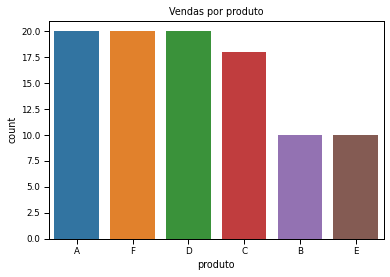

In [9]:
#@title
sns.countplot(data=df, x='produto', order=df['produto'].value_counts().index)
plt.title('Vendas por produto')
plt.show()

Os produtos **A, D e F** são os mais vendidos.

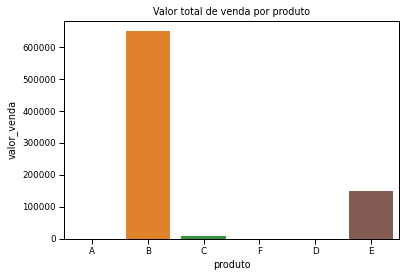

In [10]:
#@title
sns.barplot(data=df, x='produto', y='valor_venda', ci=None)
plt.title('Valor total de venda por produto')
plt.show()

**Mas o produto B** é o que gera mais valor de venda.
Na verdade, os produtos mais vendidos são gratuitos, aparentemente.

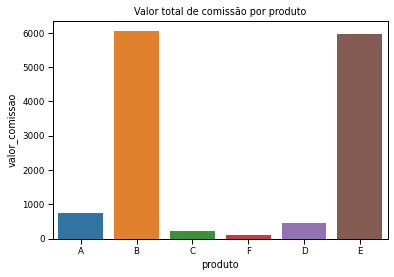

In [11]:
#@title
sns.barplot(data=df, x='produto', y='valor_comissao', ci=None)
plt.title('Valor total de comissão por produto')
plt.show()

Os produtos que geram mais comissão são o **B e E**. Os mesmos que acumulam maior valor de venda.


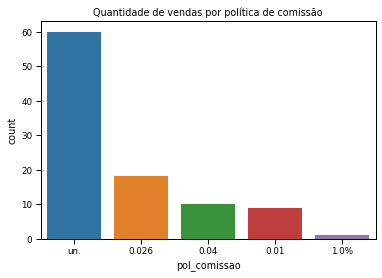

In [12]:
#@title
sns.countplot(data=df, x='pol_comissao', order=df['pol_comissao'].value_counts().index)
plt.title('Quantidade de vendas por política de comissão')
plt.show()

A política de comissão mais comum é a **por unidade**.

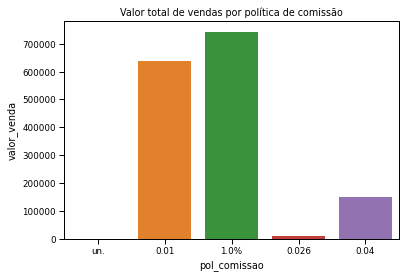

In [13]:
#@title
sns.barplot(data=df, x='pol_comissao', y='valor_venda', ci=None)
plt.title('Valor total de vendas por política de comissão')
plt.show()

As políticas de comissão com maior valor de venda são **0.01 e 1%**.

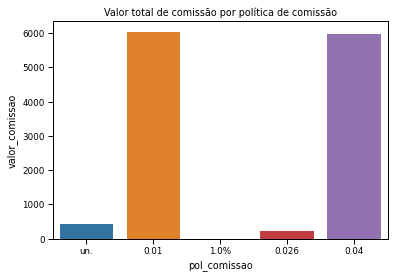

In [14]:
#@title
sns.barplot(data=df, x='pol_comissao', y='valor_comissao', ci=None)
plt.title('Valor total de comissão por política de comissão')
plt.show()

As políticas **0.01 e 0.04** registram maior valor de comissão acumulado.

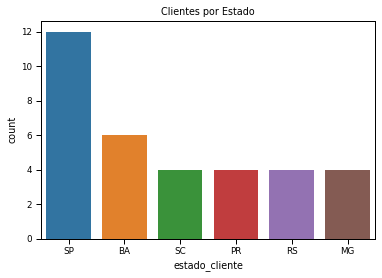

In [15]:
#@title
sns.countplot(data=df, x='estado_cliente', order=df['estado_cliente'].value_counts().index)
plt.title('Clientes por Estado')
plt.show()

**São Paulo** é o Estado com mais clientes.

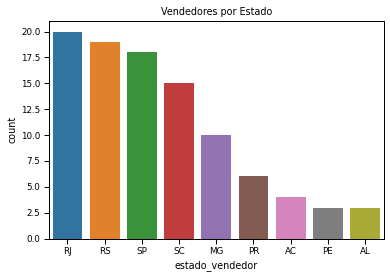

In [16]:
#@title
sns.countplot(data=df, x='estado_vendedor', order=df['estado_vendedor'].value_counts().index)
plt.title('Vendedores por Estado')
plt.show()

Os Estados com mais vendedores são **Rio de Janeiro, Rio Grande do Sul, São Paulo e Santa Catarina**.

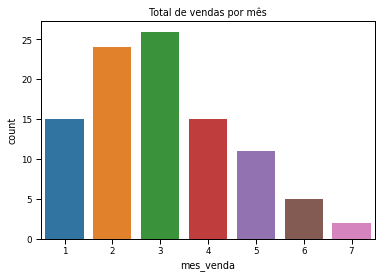

In [17]:
#@title
sns.countplot(data=df, x='mes_venda')
plt.title('Total de vendas por mês')
plt.show()

**As vendas subiram em Fevereiro e Março, caindo a partir de Abril.**

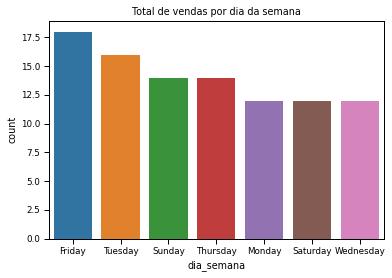

In [18]:
#@title
sns.countplot(data=df, x='dia_semana', order=df['dia_semana'].value_counts().index)
plt.title('Total de vendas por dia da semana')
plt.show()

**Terças e sextas** são os dias com mais vendas.

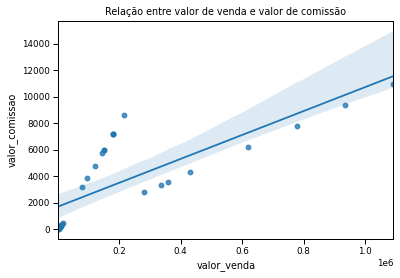

In [19]:
#@title
sns.regplot(data=df, x='valor_venda', y='valor_comissao')
plt.title('Relação entre valor de venda e valor de comissão')
plt.show()

Existe uma relação positiva entre valor de venda e valor de comissão: **quanto maior o valor de venda maior o valor de comissão**.

Mas em alguns casos esta regra não vale. *Isso poderia ser melhor explorado com mais dados*.

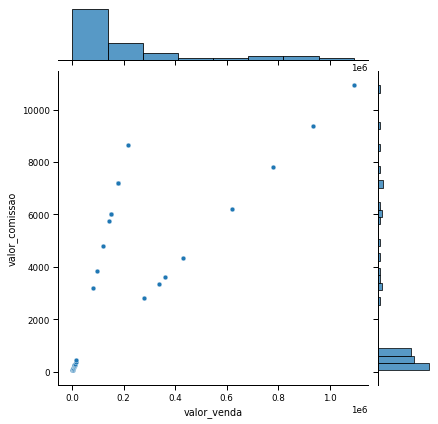

In [20]:
#@title
sns.jointplot(data=df, x='valor_venda', y='valor_comissao')

plt.show()

Os **valores mais baixos são mais comuns** tanto para o valor de venda quanto para o valor de comissão.

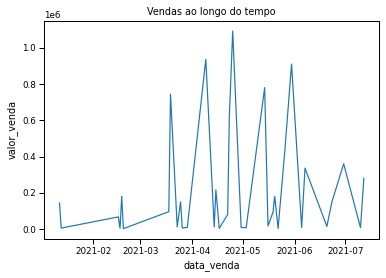

In [21]:
#@title
sns.lineplot(data=df, x='data_venda', y='valor_venda')
plt.title('Vendas ao longo do tempo')
plt.show()

Existem alguns **picos de venda** ao longo do período.

Poderíamos cruzar estes dados com outras informações para entender o motivo destes picos (proximidade de eventos importanes, dia do pagamento, etc).

In [22]:
#@title
media_comissao = df.groupby('pol_comissao').mean().reset_index()
media_comissao

,pol_comissao,valor_venda,valor_comissao,mes_venda
0,0.01,638444.444444,6045.000000,5.111111
1,0.026,8457.777778,213.480000,3.888889
2,0.04,149600.000000,5984.000000,3.500000
3,1.0%,744000.000000,NaN,3.000000
4,un.,NaN,433.333333,2.433333


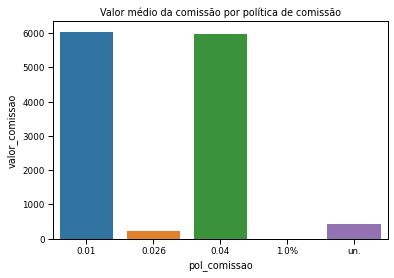

In [23]:
#@title
sns.barplot(data=media_comissao, x='pol_comissao', y='valor_comissao')
plt.title('Valor médio da comissão por política de comissão')
plt.show()

O **valor médio da comissão** é bem expressivo quando a política de comissão é de 0,01 ou de 0,04.

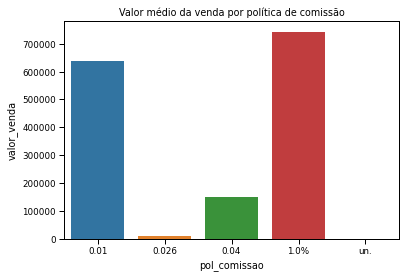

In [24]:
#@title
sns.barplot(data=media_comissao, x='pol_comissao', y='valor_venda')
plt.title('Valor médio da venda por política de comissão')
plt.show()

Quando olhamos para o **valor médio de venda**, a política de comissão que se destaca é a de 1%.

In [25]:
#@title
media_comissao_por_produto = df.groupby('produto').mean().reset_index()
media_comissao_por_produto

,produto,valor_venda,valor_comissao,mes_venda
0,A,NaN,750.00,1.900000
1,B,649000.000000,6045.00,4.900000
2,C,8457.777778,213.48,3.888889
3,D,NaN,450.00,2.900000
4,E,149600.000000,5984.00,3.500000
5,F,NaN,100.00,2.500000


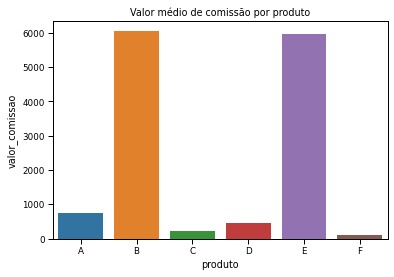

In [26]:
#@title
sns.barplot(data=media_comissao_por_produto, x='produto', y='valor_comissao')
plt.title('Valor médio de comissão por produto')
plt.show()

Os produtos B e E têm a melhor **média de comissões**.

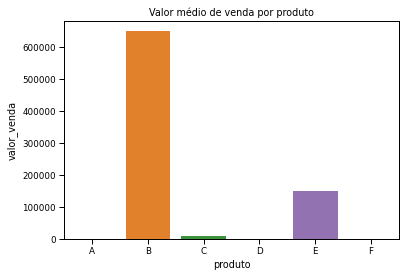

In [27]:
#@title
sns.barplot(data=media_comissao_por_produto, x='produto', y='valor_venda')
plt.title('Valor médio de venda por produto')
plt.show()

O **ticket médio** do produto B é o maior.

In [28]:
#@title
corr_df = pd.get_dummies(df[['valor_venda',
       'pol_comissao', 'valor_comissao', 'estado_cliente', 'estado_vendedor',
       'produto', 'vendedor_id']]).corr()



---



---


**Tabela de correlação:**

In [29]:
#@title
corr_df.query("valor_venda > 0.75")

,valor_venda,valor_comissao,pol_comissao_0.01,pol_comissao_0.026,pol_comissao_0.04,pol_comissao_1.0%,pol_comissao_un.,estado_cliente_BA,estado_cliente_MG,estado_cliente_PR,estado_cliente_RS,estado_cliente_SC,estado_cliente_SP,estado_vendedor_AC,estado_vendedor_AL,estado_vendedor_MG,estado_vendedor_PE,estado_vendedor_PR,estado_vendedor_RJ,estado_vendedor_RS,estado_vendedor_SC,estado_vendedor_SP,produto_A,produto_B,produto_C,produto_D,produto_E,produto_F,vendedor_id_V_1,vendedor_id_V_10,vendedor_id_V_11,vendedor_id_V_12,vendedor_id_V_13,vendedor_id_V_14,vendedor_id_V_15,vendedor_id_V_16,vendedor_id_V_17,vendedor_id_V_18,vendedor_id_V_19,vendedor_id_V_2,vendedor_id_V_20,vendedor_id_V_21,vendedor_id_V_22,vendedor_id_V_23,vendedor_id_V_24,vendedor_id_V_25,vendedor_id_V_26,vendedor_id_V_27,vendedor_id_V_3,vendedor_id_V_30,vendedor_id_V_31,vendedor_id_V_32,vendedor_id_V_34,vendedor_id_V_36,vendedor_id_V_39,vendedor_id_V_4,vendedor_id_V_40,vendedor_id_V_41,vendedor_id_V_45,vendedor_id_V_46,vendedor_id_V_47,vendedor_id_V_5,vendedor_id_V_6,vendedor_id_V_7,vendedor_id_V_8,vendedor_id_V_9
valor_venda,1.000000,0.763333,0.784569,-0.647777,-0.128076,0.289132,NaN,-0.236351,0.025430,0.338527,NaN,NaN,-0.161190,-0.098709,-0.064284,-0.063020,0.118873,NaN,-0.088303,0.134117,0.072229,-0.066738,NaN,0.862586,-0.647777,NaN,-0.128076,NaN,NaN,NaN,NaN,NaN,NaN,-0.038465,-0.038465,NaN,NaN,NaN,-0.235067,NaN,NaN,NaN,-0.163686,NaN,-0.228742,0.615608,-0.161319,NaN,NaN,NaN,NaN,NaN,0.118873,-0.064284,NaN,NaN,-0.081144,-0.018643,0.289132,0.221465,0.079583,0.503727,0.073416,-0.160028,-0.164805,-0.161190
valor_comissao,0.763333,1.000000,0.573115,-0.214438,0.639909,NaN,-0.606381,-0.131889,0.290763,0.530538,-0.078927,-0.078927,-0.143622,0.041832,0.153771,-0.101324,0.000108,-0.081591,-0.221721,0.173625,0.288521,-0.155921,-0.162990,0.573115,-0.214438,-0.227736,0.639909,-0.303272,-0.046036,-0.064323,-0.064323,-0.064323,-0.064323,0.310561,0.310561,-0.085658,-0.085658,-0.085658,-0.131993,-0.046036,-0.112286,-0.166353,-0.092934,-0.046036,-0.083243,0.197817,-0.102584,-0.064323,-0.046036,-0.046036,-0.107264,-0.060232,0.000108,0.230098,-0.064323,-0.046036,0.279404,0.244094,NaN,0.201231,0.089788,0.431255,0.095993,-0.076499,-0.060239,NaN
pol_comissao_0.01,0.784569,0.573115,1.000000,-0.150840,-0.107198,-0.032288,-0.399586,-0.081210,0.291548,0.291548,-0.065598,-0.065598,-0.118787,-0.065598,-0.056510,0.126255,0.148600,-0.081210,-0.073356,0.022800,0.061084,-0.059591,-0.161025,0.943339,-0.150840,-0.161025,-0.107198,-0.161025,-0.045899,-0.045899,-0.045899,-0.045899,-0.045899,-0.045899,-0.045899,-0.045899,-0.045899,-0.045899,-0.081210,-0.045899,-0.073734,-0.094809,-0.065598,-0.045899,-0.081210,0.291548,-0.065598,-0.045899,-0.045899,-0.045899,-0.065598,-0.032288,0.148600,-0.045899,-0.045899,-0.045899,-0.056510,-0.032288,-0.032288,0.319292,0.319292,0.453893,0.453893,-0.045899,-0.045899,-0.045899
produto_B,0.862586,0.573115,0.943339,-0.159901,-0.113636,0.301200,-0.423587,-0.086088,0.271200,0.271200,-0.069538,-0.069538,-0.125922,-0.069538,-0.059904,0.109091,0.135783,-0.086088,-0.087056,0.005221,0.043947,0.014213,-0.170697,1.000000,-0.159901,-0.170697,-0.113636,-0.170697,-0.048656,-0.048656,-0.048656,-0.048656,-0.048656,-0.048656,-0.048656,-0.048656,-0.048656,-0.048656,-0.086088,-0.048656,-0.078163,-0.100504,-0.069538,-0.048656,-0.086088,0.271200,-0.069538,-0.048656,-0.048656,-0.048656,-0.069538,-0.034227,0.135783,-0.048656,-0.048656,-0.048656,-0.059904,-0.034227,0.301200,0.301200,0.301200,0.428174,0.428174,-0.048656,-0.048656,-0.048656


Quando observamos a **correlação** entre as variáveis, vemos que o valor de venda está fortemente correlacionado com: 

* o valor da comissão;
* a política de comissão 0.01;
* o produto B.

Por sua vez, **o valor da comissão está fortemente correlacionado com o valor de venda.**

Esses indícios poderiam ser melhor explorados com mais dados.

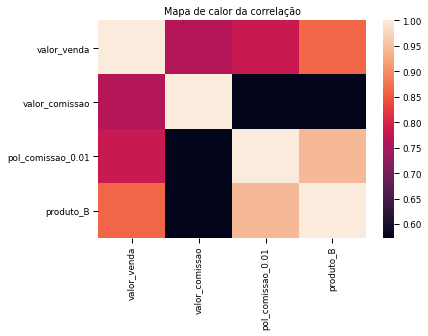

In [30]:
#@title
sns.heatmap(corr_df.query("valor_venda > 0.75")[['valor_venda', 'valor_comissao', 'pol_comissao_0.01', 'produto_B']])
plt.title('Mapa de calor da correlação')
plt.show()